In [31]:
from ising import generate_configuration, propagate, Trajectory, filter_trajectories, generate_trajectory_name, plot_configuration
import numpy as np
from matplotlib import pyplot as plt

# Simulation

In [40]:
temperatures = np.arange(0.1, 3.55, 0.05)
J = 1
B = 0
N = 10

for temperature in temperatures:
    configuration = generate_configuration(N=N, random=False)
    filename = generate_trajectory_name(N=N, J=J, B=B, temperature=temperature, folder="ising_analysis_traj")
    propagate(configuration=configuration, n_timestep=100000, n_output=100, J=J, B=B, temperature=temperature, filename=filename)

# Analysis

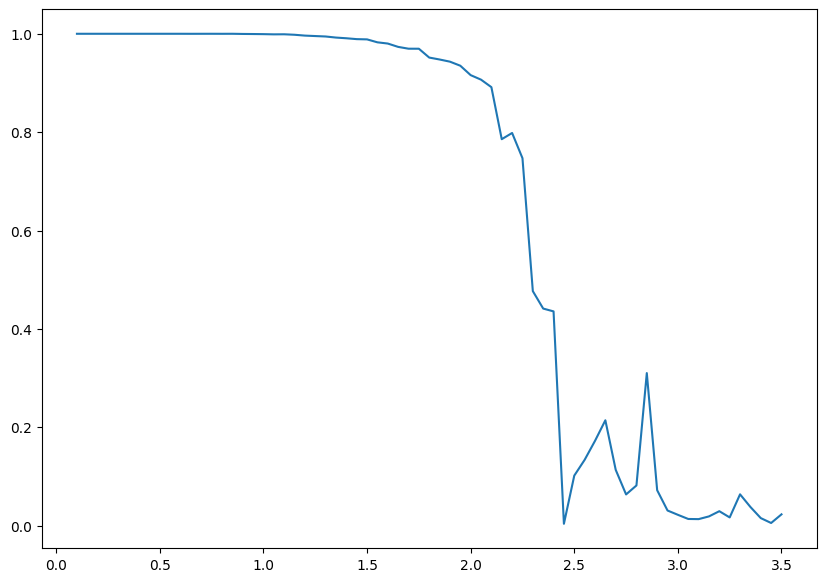

In [41]:
filtered_trajectories = filter_trajectories(N=10, J=1, B=0, temperature=(0.1, 3.55), folder="ising_analysis_traj")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

temperatures = []
magnetizations = []

for name, params in filtered_trajectories.items():
    temperatures.append(params["temperature"])
    trajectory = Trajectory.from_file(name)
    magnetizations.append(trajectory.magnetization(r_equil=0.3))

indices = np.argsort(temperatures)

ax.plot(np.array(temperatures)[indices], np.abs(np.array(magnetizations))[indices])

plt.show()